![spicy_meme](https://jeinson.github.io/images/mem2.jpg)

<center>Depends who you ask...</center>

# Lab 3: Linear Regression with Stochatic Gradient Descent 

In the previous lab, we introduced auto differentiation, then used gradient descent to maximize the likelihood for simple model parameters. Today, we'll build on this knowledge by implementing linear regression using pytorch's Neural Network package, `torch.nn`. 

To review, in least squares linear regression we have a design matrix $X$ and a set of corresponding outcomes $Y$, and the goal is to learn a $\beta$ such that $\hat{Y} = X^\top \beta + \epsilon$ minimizes the loss function $\frac{1}{n}\sum_n (Y - \hat{Y})^2$, with $\mathbb{E}[\epsilon] = 0$

In the simple case of one feature and one output (see above meme):

$$ 
Y = 
\begin{bmatrix}
Y_1 \\
Y_2 \\
\vdots \\
Y_n 
\end{bmatrix}  , 
X = \begin{bmatrix}
1 & X_1 \\
1 & X_2 \\
\vdots & \vdots \\
1 & X_n 
\end{bmatrix} ,
\beta = 
 \begin{bmatrix}
\beta_1 \\
\beta_2 
\end{bmatrix}, \text{and } 
\epsilon = 
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\ 
\vdots \\
\epsilon_n
\end{bmatrix}
$$

In $X$, the leading column of 1s allows for an intercept parameter. 

The most common method used for solving linear equations is the **Method of Least Squares**. This is what popular packages like scikit learn or R's `lm` function are doing under the hood. With some fun matrix algebra, the solution pops out fairly easily. 

$$\begin{align}
X\beta &= Y\\
X^\top X\beta &= X^\top Y \\
(X^\top X)^{-1}X^\top X \beta&= (X^\top X)^{-1} X^\top Y \\
&\implies \\
\hat{\beta}&= (X^\top X)^{-1} X^\top Y
\end{align}
$$

This solution involves taking the inverse of a matrix, which gets computationally very expensive as the size of your dataset increases. Therefore, we can think of the problem of optimizing $\beta$ in terms of the machine learning workflow discussed in class, where essentially, we try to mimize the quantity $Q$ in 
$$ (X^\top \beta -  Y)^\top (X^\top \beta - Y) = Q $$
The matrix calculus needed to optimize $\beta$ is pretty ugly, but fortunately we can use autodifferentiation and gradient descent to arrive at an optimal solution. The task of modeling linear regression can be thought of in terms of the machine learning workflow discussed in class. 

![Learning Algorithm](https://jeinson.github.io/images/Learning_Algorithm.png)

In [4]:
# Import the following modules. These are the only ones needed to complete the lab. 
# -.5 if you import any other modules ;-)
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

## Part 1: Simulate some data

Using torch tensors, randomly draw a `[2 x 1] `$\beta$ vector, and 50 random $X_i$s for training. Then matrix multiply $X$ and $\beta$, and add some Gaussian noise, to make a $Y$ vector. This will be the training set used for training your regression model.

In [22]:
def OLSmodel(X):
    beta = torch.rand(1,1) # randomly initialize model parameters 
    return X*beta.t()

# create random X
X = torch.rand(50,1)# 2D matrix with intercept & 1 randomly initialized parameter
# create output (Y) 
Y = torch.from_numpy(np.add(OLSmodel(X).data.numpy(), # OLSmodel output in an numpy array
                    np.random.normal(scale = 0.04,size=np.shape(product)))) # add Gaussian noise

Plot X and Y to verify their linear relationship. 

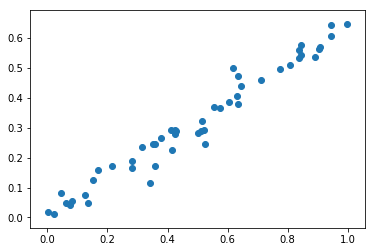

In [23]:
plt.scatter(X,Y)

## Part 2: Solve Ordinary Least Squares
### Loss Function: 
#### (𝑋⊤𝛽−𝑌)⊤(𝑋⊤𝛽−𝑌) = 𝑄
Using the loss function presented above, find the least squares solution for your sample dataset. This will be accomplished by using Pytorchs' built-in optimization algorithms. 

To use torch.optim,  you have to construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients. The parameters will be updated over multiple epochs (as conducted by calling `optimizer.step()`. See more below:

https://pytorch.org/docs/stable/optim.html#torch.optim.Optimizer

In [16]:
# define the loss function
def OLS_loss(X, beta, Y):
    return torch.mm(((X.mm(beta).t().double()) - Y), ((X.mm(beta).t().double()) - Y))

# optimizer object will hold the current state and will update the parameters based on the computed gradients.
optimizer = torch.optim.SGD([beta], lr = 0.01, momentum=0.9)
#optimizer = torch.optim.Adam([var1, var2], lr = 0.0001)

# update parameters
optimizer.zero_grad()
loss = OLS_loss(X, beta, Y)
loss.backward()
optimizer.step()

# Jack's solution
Y_hat = OLSmodel(X)
Mse = (Est_y - real_y).pow(2).sum()
(Something).zero_grad()
Mse.backward()
Optimizer.step()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Now plot a trend line on your data using your least squares estimate. 

In [ ]:
#### your code here ####

## Part 3: Defining the model as a neural network

In pytorch, neural networks are are typically constructed by defining a class that includes at the very least a `forward` method. Some information on the `torch.nn` module is [here](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

Fill in the missing pieces to make a neural network class called `LinearRegression` .

In [34]:
class LinearRegression(nn.Module):
    
    # The class constructor defines the parameters (ie layers) of the neural network
    def __init__(self):
        # salling Super Class's constructor
        super(LinearRegression, self).__init__()
        # This neural network will have a single linear layer
        self.linear = nn.Linear(input_dim, output_dim)
    
    # The forward() method ties the layers together to build the network
    # We take the gradient of this composite function using back propogation
    def forward(self, x):
        # the forward pass is simply a linear function
        out = self.linear(x)
        return out
    
input_dim, output_dim = 1, 1

Before training, the model initializes with random parameters. Define a new LinearRegression object, and print the values of the parameters. 

In [37]:
linear_model = LinearRegression()
#### your code here ####

The next step is defining a loss function, which our model will attempt to miminize during training, and an optimization function, which specifies the learning method and learning rate. The most commonly used optimizer is **Stochastic Gradient Descent**, which is conveniently implemented as `torch.optim.SGD`. More on this [here](https://pytorch.org/docs/stable/optim.html). Which loss function should you use to optimizer the parameters in linear regression? [Check here for some options](https://pytorch.org/docs/stable/nn.html#loss-functions)

Define a loss object called `criterion` and an optimizer object called `optimizer`, for the parameters of your new `LinearRegression` object, and with a learning rate of .01. (You may have to play around with the learning rate if your model diverges off to infinity)

In [39]:
criterion = nn.MSELoss() # Mean Squared Loss
learningRate = 0.01
optimiser = torch.optim.SGD(linear_model.parameters(), lr = learningRate) # Stochastic Gradient Descent
epochs = 2000

Finally, let's train the model. This is where the magic happens! In training, we iterate through the process of choosing parameters, calculating the loss, then marching down the gradient until the parameters converge. Fill in the following code chunk to optimize the parameters of `lr_model`

In [ ]:
epochs = 200

for epoch in range(epochs):
        
    # Estimate Y_hat with the current model

    # Compute the loss
        
    # Compute the gradient of the loss, and update the model parameters with the optimizer
    # Don't forget to zero the gradient after each epoch!

    if epoch % 10 == 0:
        print("loss {}, beta 1 {}".format(loss,list(lr_model.parameters())[1].detach().numpy()))
        
        
for epoch in range(epochs):

    epoch +=1
    #increase the number of epochs by 1 every time
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

Now plot the dataset with a trend line defined by the parameters your neural network learned, in addition to the OLS trend line, and label which is which. Try setting the alpha if they end up right on top of each other, or moving one of the lines over a bit so they are both easy to see. 

In [ ]:
#### your code here ####

Pretty cool huh? I'll leave it up to you to decide which method you like better, but hopefully this demonstrates the flexibility of a neural network. Later on, we'll see how this package can be used to learn far more complicated patterns in data. 